In [1]:
 #Importing Libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
print('Libraries Imported')

Libraries Imported


In [3]:
#df = pd.read_excel('data/input/Drastic-Model-Data-For-ML-Analysis.xlsx', header=0)

In [5]:
#df.to_csv('data/input/Drastic-Model-Data-For-ML-Analysis.csv', index=False)

In [7]:
#df.head()

,OBJECTID *,pointid,grid_code,Vulnerabil,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,1,3254,2,Low (47-78),<Null>,6,1,3,1,5,1
1,2,3255,3,Medium (78-100),3,4,1,3,1,5,1
2,3,3256,3,Medium (78-100),3,4,1,3,1,5,1
3,4,3257,3,Medium (78-100),1,4,1,3,1,5,1
4,5,3258,3,Medium (78-100),2,4,1,3,1,5,1


In [2]:
df = pd.read_csv('data/input/Drastic-Model-Data-For-ML-Analysis.csv')

In [3]:
df.head()

,OBJECTID *,pointid,grid_code,Vulnerabil,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,1,3254,2,Low (47-78),<Null>,6,1,3,1,5,1
1,2,3255,3,Medium (78-100),3,4,1,3,1,5,1
2,3,3256,3,Medium (78-100),3,4,1,3,1,5,1
3,4,3257,3,Medium (78-100),1,4,1,3,1,5,1
4,5,3258,3,Medium (78-100),2,4,1,3,1,5,1


In [4]:
df.dtypes

OBJECTID *                int64
pointid                   int64
grid_code                 int64
Vulnerabil               object
Tropograpy               object
Soil__Media              object
Net_Recharge             object
Impact_Vandose_Zone       int64
Hydrolic_Conductivity     int64
Depth_to_Acquifer         int64
Aquirfer_Media            int64
dtype: object

In [6]:
df = df.drop(['OBJECTID *', 'Vulnerabil'], axis=1) # remove full column

In [7]:
df.head()

,pointid,grid_code,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,3254,2,<Null>,6,1,3,1,5,1
1,3255,3,3,4,1,3,1,5,1
2,3256,3,3,4,1,3,1,5,1
3,3257,3,1,4,1,3,1,5,1
4,3258,3,2,4,1,3,1,5,1


## Understanding Class Imbalance in Multiclass Datasets

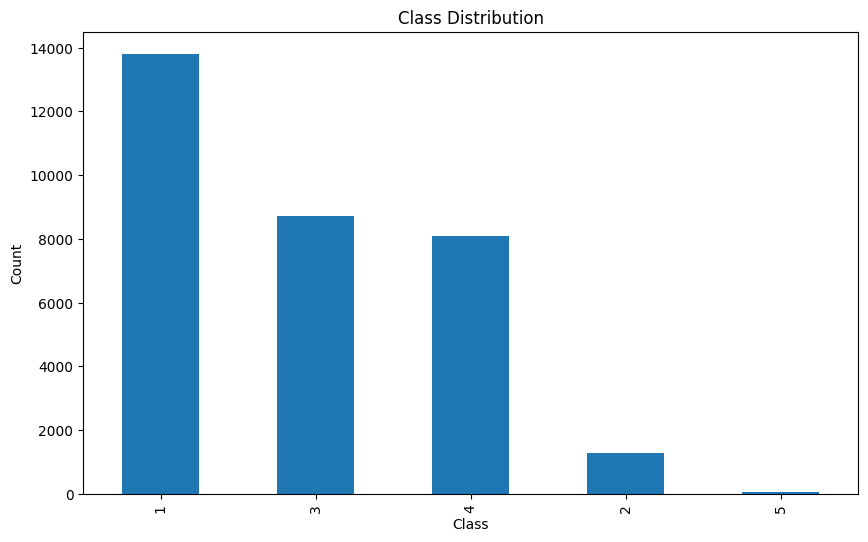

grid_code
1    13804
3     8706
4     8085
2     1271
5       52
Name: count, dtype: int64
grid_code
1    0.432483
3    0.272761
4    0.253305
2    0.039821
5    0.001629
Name: count, dtype: float64


In [8]:
# Visualize class distribution
plt.figure(figsize=(10, 6))
df['grid_code'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Calculate class frequencies and ratios
class_counts = df['grid_code'].value_counts()
class_ratios = class_counts / class_counts.sum()

print(class_counts)
print(class_ratios)

In [9]:
# <Null>
df1 = df.replace("<Null>", None)

In [10]:
# Check for missing values
print(df1.isnull().sum())  # Counts missing values per column
print(df1.info())  # Provides overall information

pointid                    0
grid_code                  0
Tropograpy               460
Soil__Media              159
Net_Recharge              54
Impact_Vandose_Zone        0
Hydrolic_Conductivity      0
Depth_to_Acquifer          0
Aquirfer_Media             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31918 entries, 0 to 31917
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   pointid                31918 non-null  int64 
 1   grid_code              31918 non-null  int64 
 2   Tropograpy             31458 non-null  object
 3   Soil__Media            31759 non-null  object
 4   Net_Recharge           31864 non-null  object
 5   Impact_Vandose_Zone    31918 non-null  int64 
 6   Hydrolic_Conductivity  31918 non-null  int64 
 7   Depth_to_Acquifer      31918 non-null  int64 
 8   Aquirfer_Media         31918 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 2.2+ MB
None


In [11]:
df1.head(3)

,pointid,grid_code,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,3254,2,None,6,1,3,1,5,1
1,3255,3,3,4,1,3,1,5,1
2,3256,3,3,4,1,3,1,5,1


In [11]:
# df1[df1.apply(lambda x: x.Tropograpy == None and x.grid_code == 1, axis=1)][['grid_code', 'Tropograpy']].head()
df1[df1.apply(lambda x: x.Tropograpy == None and x.grid_code == 1, axis=1)][['grid_code']].count()

grid_code    86
dtype: int64

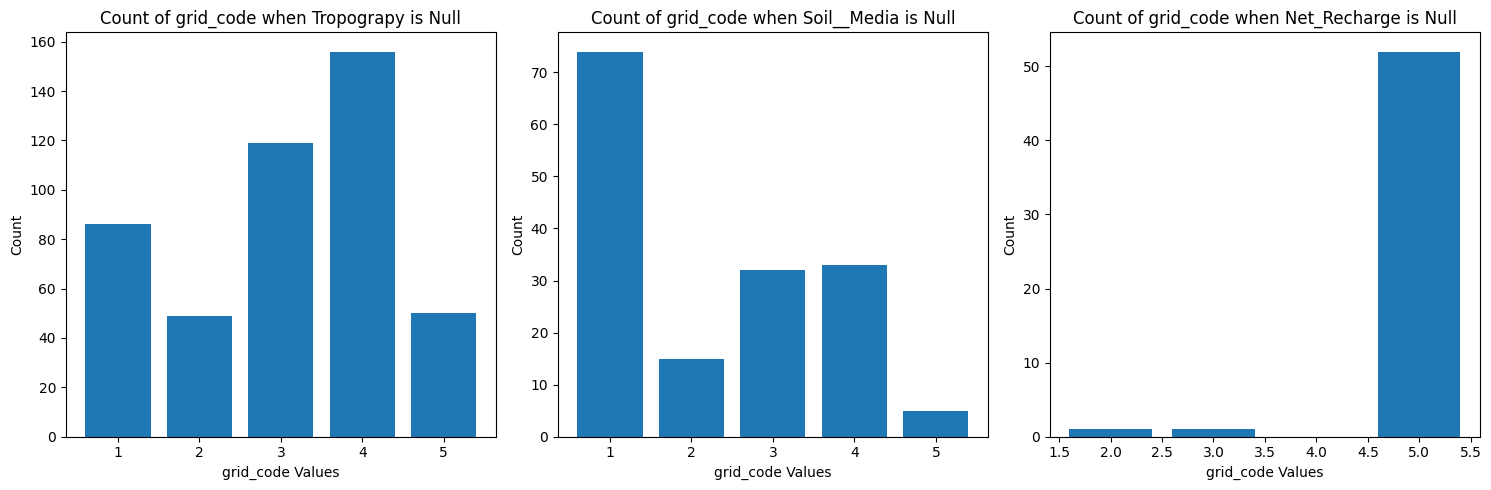

In [12]:
# Create a new figure for plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns


NULL_VALUES_COLS = df1.columns[df1.isnull().any()] # get null columns
TARGET_COL = 'grid_code'

# Iterate over columns and create subplots
for i, col in enumerate(NULL_VALUES_COLS):
    counts = df1[df1[col].isna()][TARGET_COL].value_counts()
    axes[i].bar(counts.index, counts.values)
    axes[i].set_xlabel(f'{TARGET_COL} Values')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Count of {TARGET_COL} when {col} is Null')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Display the plot
plt.show()

### Data Cleaning

In [13]:
# drop all Null value rows
# Drop rows with null values
df_cleaned = df1.dropna()
print(f"df_cleaned.shape: {df_cleaned.shape}")
print(f"df.shape: {df.shape}")
print(f"df1.shape: {df1.shape}")

df_cleaned.shape: (31387, 9)
df.shape: (31918, 9)
df1.shape: (31918, 9)


In [17]:
from prettytable import PrettyTable

In [18]:
# Create a PrettyTable instance
table = PrettyTable()

# Add columns from the DataFrame to the table
for col in df_cleaned.head(3).columns:
    table.add_column(col, df_cleaned.head(3)[col].tolist())

# Print the table
print(table)
print("\n====***====\n")
table = PrettyTable()
# Add columns from the DataFrame to the table
for col in df_cleaned.tail(3).columns:
    table.add_column(col, df_cleaned.tail(3)[col].tolist())

# Print the table
print(table)

+---------+-----------+------------+-------------+--------------+---------------------+-----------------------+-------------------+----------------+
| pointid | grid_code | Tropograpy | Soil__Media | Net_Recharge | Impact_Vandose_Zone | Hydrolic_Conductivity | Depth_to_Acquifer | Aquirfer_Media |
+---------+-----------+------------+-------------+--------------+---------------------+-----------------------+-------------------+----------------+
|   3255  |     3     |     3      |      4      |      1       |          3          |           1           |         5         |       1        |
|   3256  |     3     |     3      |      4      |      1       |          3          |           1           |         5         |       1        |
|   3257  |     3     |     1      |      4      |      1       |          3          |           1           |         5         |       1        |
+---------+-----------+------------+-------------+--------------+---------------------+-------------------

In [21]:
print("Number of unique values in 'grid_code':", df_cleaned['grid_code'].nunique())
df_cleaned['grid_code'].unique()

Number of unique values in 'grid_code': 4


array([3, 2, 1, 4])

In [ ]:
# Convert to dictionary
dictionary = df.set_index('grid_code')['Vulnerabil'].to_dict()
dictionary

In [23]:
value_counts = df_cleaned['grid_code'].value_counts()
value_counts

grid_code
1    13672
3     8571
4     7925
2     1219
Name: count, dtype: int64

##### '''As we have imbalanced dataset, so we will use Stratified K-Fold technique where we may use Grid Search / Randomized Search to 
##### optimize the underlying hyperparameters.'''

'''
##### And we know that - 
##### Oversampling: This technique involves increasing the number of instances in the minority class.
##### Hybrid Approaches: Combining oversampling and undersampling techniques can be effective in certain scenarios.   
##### Class Weighting: Assigning different weights to different classes can help balance the impact of class imbalance.   
##### Algorithm Selection: Choosing algorithms that are robust to class imbalance, such as decision trees or ensemble methods 
##### like Random Forest and XGBoost.
'''

### Train Test Splitting

In [19]:
df1.head()

,pointid,grid_code,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,3254,2,None,6,1,3,1,5,1
1,3255,3,3,4,1,3,1,5,1
2,3256,3,3,4,1,3,1,5,1
3,3257,3,1,4,1,3,1,5,1
4,3258,3,2,4,1,3,1,5,1


### Imputation (Filling None values with Central values (Mean/Median/Mode), here is the Mean as all are numerical data
### Using KNN Imputation!!

In [22]:
from sklearn.impute import KNNImputer

In [23]:
df = pd.DataFrame(df1)

# Initialize KNNImputer with a specified number of neighbors
imputer = KNNImputer(n_neighbors=2)

# Apply KNN imputation on the entire DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("Original DataFrame:")
print(df1)
print("\nDataFrame after KNN Imputation:")
print(df_imputed)

Original DataFrame:
       pointid  grid_code Tropograpy Soil__Media Net_Recharge  \
0         3254          2       None           6            1   
1         3255          3          3           4            1   
2         3256          3          3           4            1   
3         3257          3          1           4            1   
4         3258          3          2           4            1   
...        ...        ...        ...         ...          ...   
31913     3249          3          1           6            3   
31914     3250          5       None           4         None   
31915     3251          5       None           5         None   
31916     3252          5       None           6         None   
31917     3253          5       None           6         None   

       Impact_Vandose_Zone  Hydrolic_Conductivity  Depth_to_Acquifer  \
0                        3                      1                  5   
1                        3                      1      

In [24]:
df_imputed.describe()

,pointid,grid_code,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
count,31918.000000,31918.000000,31918.000000,31918.000000,31918.000000,31918.000000,31918.000000,31918.000000,31918.000000
mean,15959.500000,2.351776,2.066624,3.168040,3.577339,2.720753,2.791215,3.054891,1.446958
std,9214.077282,1.268634,0.912546,1.756301,1.291732,0.789021,1.178903,1.591383,0.991199
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7980.250000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000
50%,15959.500000,3.000000,2.000000,4.000000,4.000000,3.000000,3.000000,3.000000,1.000000
75%,23938.750000,4.000000,3.000000,4.000000,5.000000,3.000000,4.000000,5.000000,1.000000
max,31918.000000,5.000000,5.000000,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000


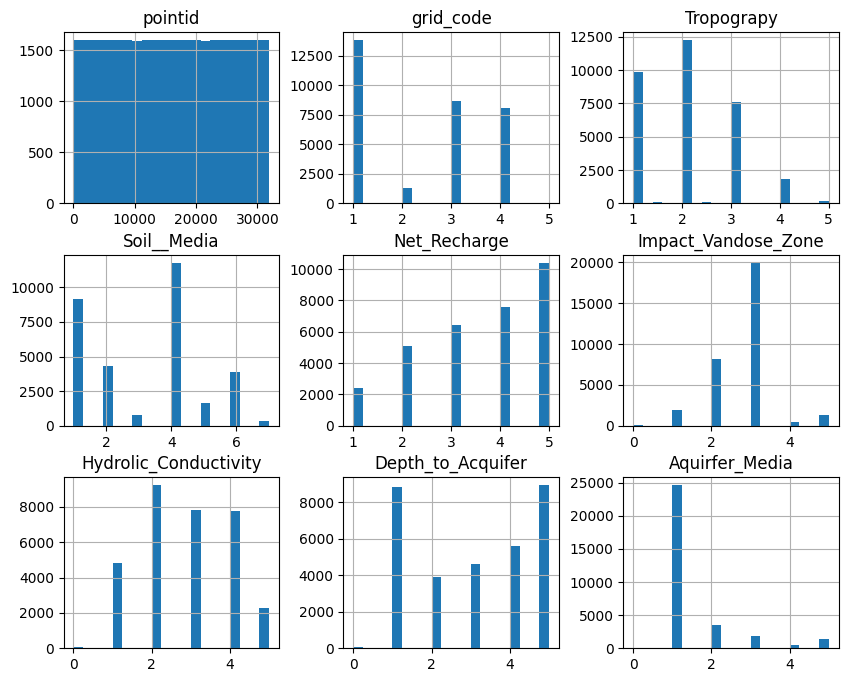

In [25]:
# Plot histogram for each feature
df_imputed.hist(bins=20, figsize=(10, 8))
plt.show()

In [26]:
df_cleaned = df_imputed

In [27]:
df_cleaned.head()

,pointid,grid_code,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,3254.0,2.0,3.0,6.0,1.0,3.0,1.0,5.0,1.0
1,3255.0,3.0,3.0,4.0,1.0,3.0,1.0,5.0,1.0
2,3256.0,3.0,3.0,4.0,1.0,3.0,1.0,5.0,1.0
3,3257.0,3.0,1.0,4.0,1.0,3.0,1.0,5.0,1.0
4,3258.0,3.0,2.0,4.0,1.0,3.0,1.0,5.0,1.0


In [84]:
X, y = df_cleaned.iloc[:, 2:], df_cleaned['grid_code']

In [29]:
print(X.shape)
print(y.shape)

(31918, 7)
(31918,)


#### Train-Test Splitting

In [85]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### KNN

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [43]:
# Standardization
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Fit model on standardized data
model = KNeighborsClassifier()
model.fit(X_train_standardized, y_train)
y_pred = model.predict(X_test_standardized)
print("Accuracy with Standardization:", accuracy_score(y_test, y_pred))

# Min-Max Normalization
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Fit model on normalized data
model.fit(X_train_normalized, y_train)
y_pred = model.predict(X_test_normalized)
print("Accuracy with Normalization:", accuracy_score(y_test, y_pred))

Accuracy with Standardization: 0.9441311612364244
Accuracy with Normalization: 0.9420426065162907


In [48]:
###INFO: `support` is how many samples are in each class.

In [73]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

### SVM (SVC)

In [72]:
from sklearn.svm import SVC

In [86]:
# Binarize the labels for ROC curve
y = label_binarize(y, classes=np.unique(y))
n_classes = y.shape[1]

In [66]:
print(y)
print(n_classes)

[[0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]
5


In [88]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

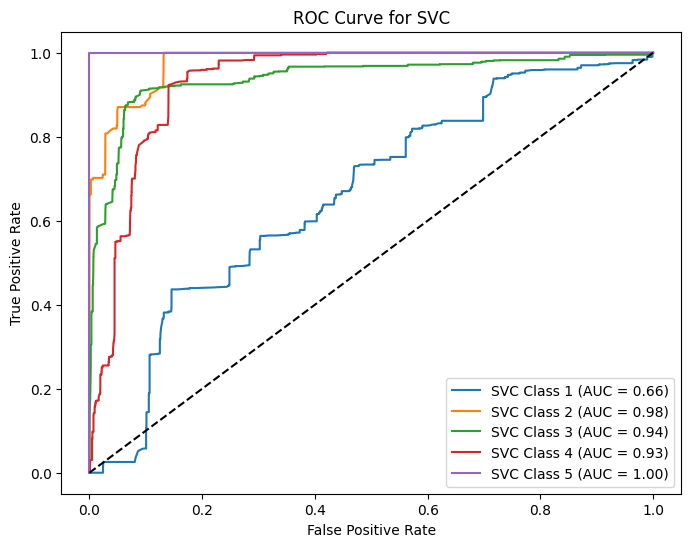

In [69]:
# Train SVC with OneVsRest strategy
svc = OneVsRestClassifier(SVC(kernel='linear', probability=True))
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_score = svc.decision_function(X_test)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"SVC Class {i+1} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVC")
plt.legend()
plt.show()

### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

Logistic Regression Accuracy: 0.5411967418546366
              precision    recall  f1-score   support

           0       0.61      0.57      0.59      2813
           1       0.80      0.70      0.75       255
           2       0.81      0.88      0.84      1688
           3       0.76      0.69      0.72      1618
           4       1.00      1.00      1.00        10

   micro avg       0.71      0.69      0.70      6384
   macro avg       0.80      0.77      0.78      6384
weighted avg       0.71      0.69      0.70      6384
 samples avg       0.80      0.69      0.64      6384



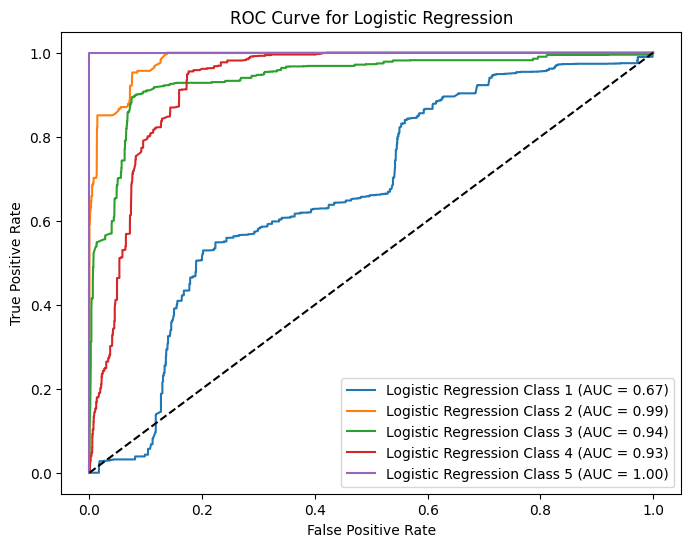

In [77]:
log_reg = OneVsRestClassifier(LogisticRegression(max_iter=1000))
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

y_score = log_reg.decision_function(X_test)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Logistic Regression Class {i+1} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()

### RandomForestClassifer (using StratifiedKFold & RandomizedSearchCV)

In [89]:
# Train RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get probability scores for ROC curve
y_score = rf.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i+1} (AUC = {roc_auc:.2f})")

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for RandomForestClassifier")
plt.legend()
plt.show()


TypeError: list indices must be integers or slices, not tuple

<Figure size 800x600 with 0 Axes>

In [30]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score

In [80]:
# Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Define the parameter grid for Randomized Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator = rf,
    param_distributions = param_grid, 
    n_iter = 10,
    cv = skf,
    scoring = 'accuracy',
    random_state = 42
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Use the best model to make predictions on the testing set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("F1-score (micro):", f1_micro)
print("F1-score (macro):", f1_macro)
print("F1-score (weighted):", f1_weighted)

Accuracy: 0.9509189640768588
F1-score (micro): 0.9509189640768588
F1-score (macro): 0.9587348029136248
F1-score (weighted): 0.9509007444103936


In [ ]:
# Get probability scores for ROC curve
y_score = rf.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i+1} (AUC = {roc_auc:.2f})")

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for RandomForestClassifier")
plt.legend()
plt.show()

#### Training Accuracy vs Testing Accuracy

train_accuracy: [0.9594038134455286]
test_accuracy: [0.9509189640768588]


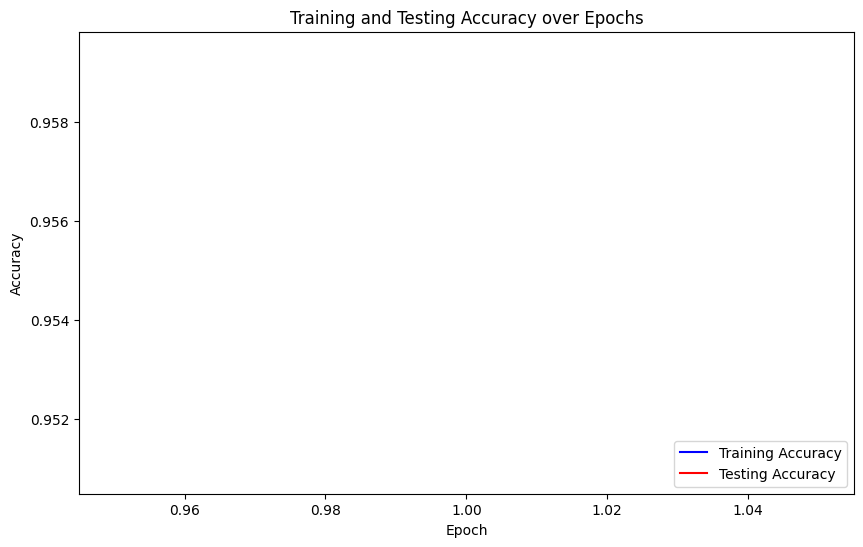

In [33]:
train_accuracy = []
test_accuracy = []

# Assuming you're training in a loop, after each epoch:
# Get predictions and calculate accuracy for the training and testing sets
train_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
train_accuracy.append(train_acc)

test_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
test_accuracy.append(test_acc)

print(f"train_accuracy: {train_accuracy}")
print(f"test_accuracy: {test_accuracy}")

epochs = range(1, len(train_accuracy) + 1)
# Plot the training and testing accuracy
plt.figure(figsize=(10, 6))
sns.lineplot(x=epochs, y=train_accuracy, label='Training Accuracy', color='b')
sns.lineplot(x=epochs, y=test_accuracy, label='Testing Accuracy', color='r')

# Add labels and title
plt.title('Training and Testing Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

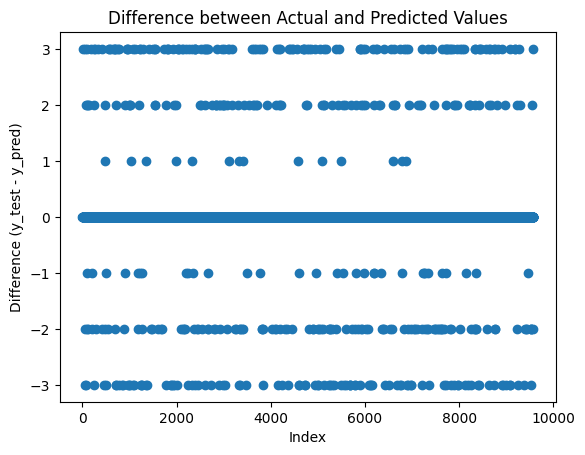

In [34]:
# Calculate the differences
differences = y_test - y_pred

# Create a scatter plot
plt.scatter(range(len(differences)), differences)
# plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Index')
plt.ylabel('Difference (y_test - y_pred)')
plt.title('Difference between Actual and Predicted Values')
# plt.grid(True)
plt.show()

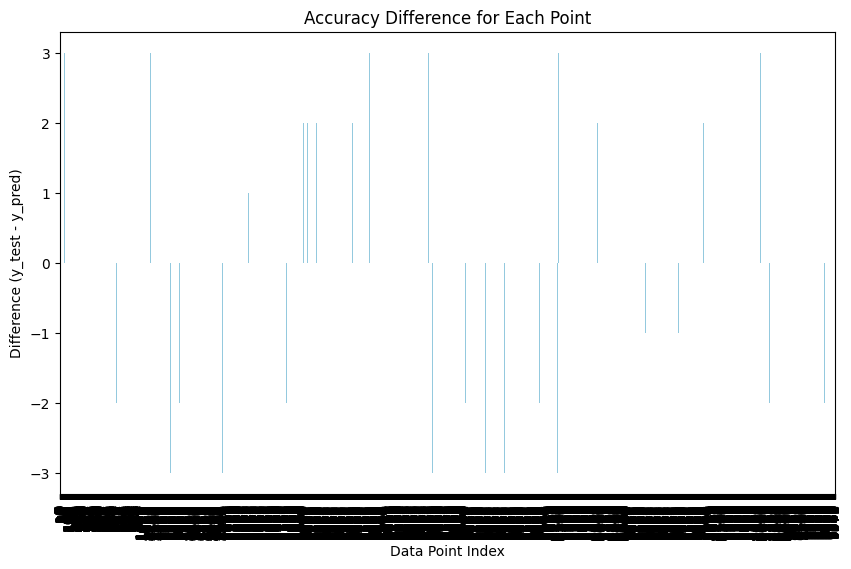

In [35]:
# Calculate the accuracy difference for each point
accuracy_diff = [y_t - y_p for y_t, y_p in zip(y_test, y_pred)]

# Create a DataFrame to organize the data
data = pd.DataFrame({'Index': range(len(y_test)), 'Accuracy Difference': accuracy_diff})

# Plot the accuracy difference using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Index', y='Accuracy Difference', data=data, color="skyblue")
plt.title('Accuracy Difference for Each Point')
plt.xlabel('Data Point Index')
plt.ylabel('Difference (y_test - y_pred)')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [25]:
from sklearn.utils import class_weight

In [27]:
X = df.iloc[2:]

In [28]:
X

,pointid,grid_code,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
2,3256,3,3,4,1,3,1,5,1
3,3257,3,1,4,1,3,1,5,1
4,3258,3,2,4,1,3,1,5,1
5,3259,3,1,4,1,2,1,5,1
6,3260,3,2,4,1,2,1,5,1
...,...,...,...,...,...,...,...,...,...
31913,3249,3,1,6,3,3,2,5,1
31914,3250,5,<Null>,4,<Null>,0,0,0,0
31915,3251,5,<Null>,5,<Null>,0,0,0,0
31916,3252,5,<Null>,6,<Null>,0,0,0,0


In [ ]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")